In [18]:
import pandas as pd
import os

# Specify the folder path containing your files
folder_path = '/Users/mseglar/GitHub/sensors-analysis/stabilityElectronics/26092024_1R0/'

# Initialize an empty list to store individual DataFrames
dataframes = []


In [19]:
folder_path

'/Users/mseglar/GitHub/sensors-analysis/stabilityElectronics/26092024_1R0/'

In [23]:
# Iterate over each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):  # Only process .txt files
        file_path = os.path.join(folder_path, file_name)

        # Read the file into a pandas DataFrame
        df = pd.read_csv(file_path, sep='\t', header=None)
        
        # Assign the provided column names
        df.columns = ['Date-Time', 'Laser_Power', 'Total_Sum', 'Total_Sqr', 'V_Mean', 'Std_V', 'Temp', 'Humidity', 'Total_Counts']
        
        # Append the DataFrame to the list
        dataframes.append(df)

# Concatenate all the DataFrames into one
final_df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the concatenated DataFrame
print(final_df.head())


ID_2_0.txt
ID_0_3.txt
ID_0_1.txt
ID_2_2.txt
ID_4_1.txt
ID_4_3.txt
             Date-Time  Laser_Power   Total_Sum     Total_Sqr    V_Mean  \
0  2024-09-26-12:30:16           15  96482227.0  1.301824e+11  0.269333   
1  2024-09-26-12:30:33           15  96681333.0  1.306784e+11  0.270630   
2  2024-09-26-12:30:49           15  96472582.0  1.300834e+11  0.269055   
3  2024-09-26-12:31:05           15  96805534.0  1.307578e+11  0.268418   
4  2024-09-26-12:31:22           15  96759506.0  1.308592e+11  0.269807   

      Std_V  Temp  Humidity  Total_Counts  
0  0.001788  21.3      38.0       71507.0  
1  0.000850  21.3      38.0       71530.0  
2  0.001620  21.3      38.0       71547.0  
3  0.001401  21.3      38.0       71670.0  
4  0.001177  21.3      38.0       71547.0  


Laser_Power:
  Mean: 15.0
  Standard Deviation (σ): 0.0
  Standard Deviation as Percentage of Mean: 0.0%


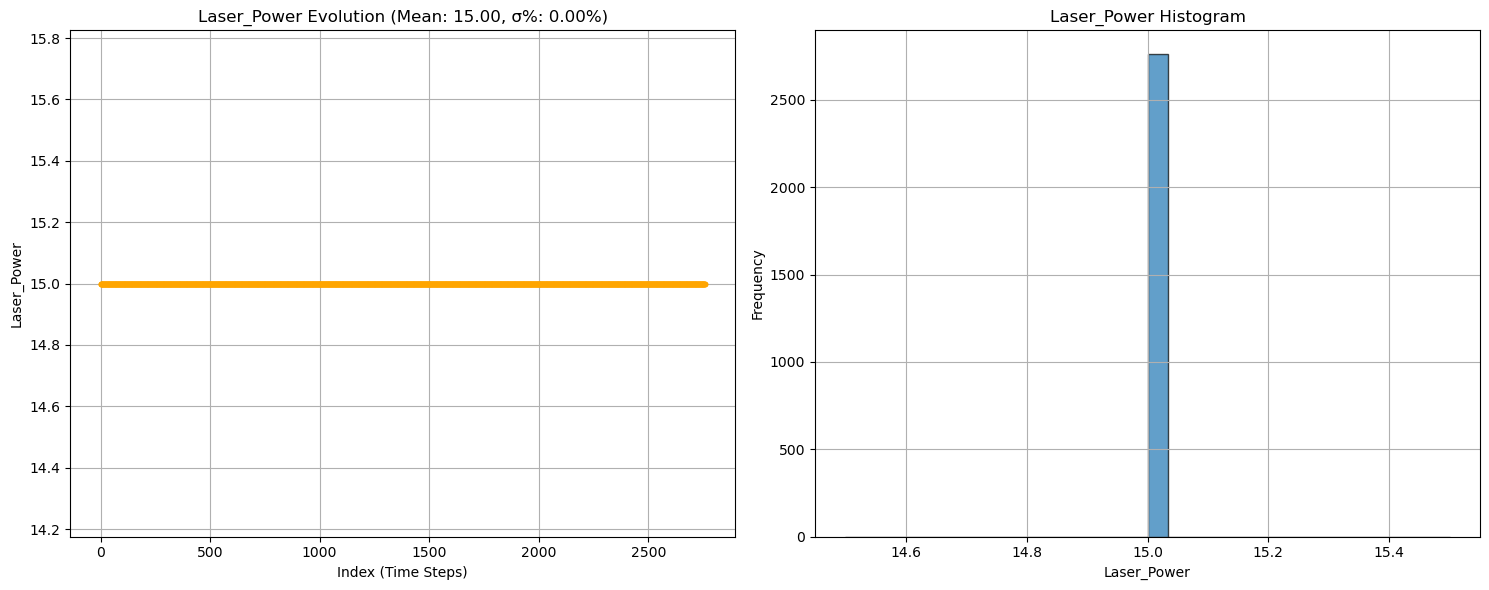

Total_Sum:
  Mean: 144720574.4347826
  Standard Deviation (σ): 67802698.01692875
  Standard Deviation as Percentage of Mean: 46.85076623122693%


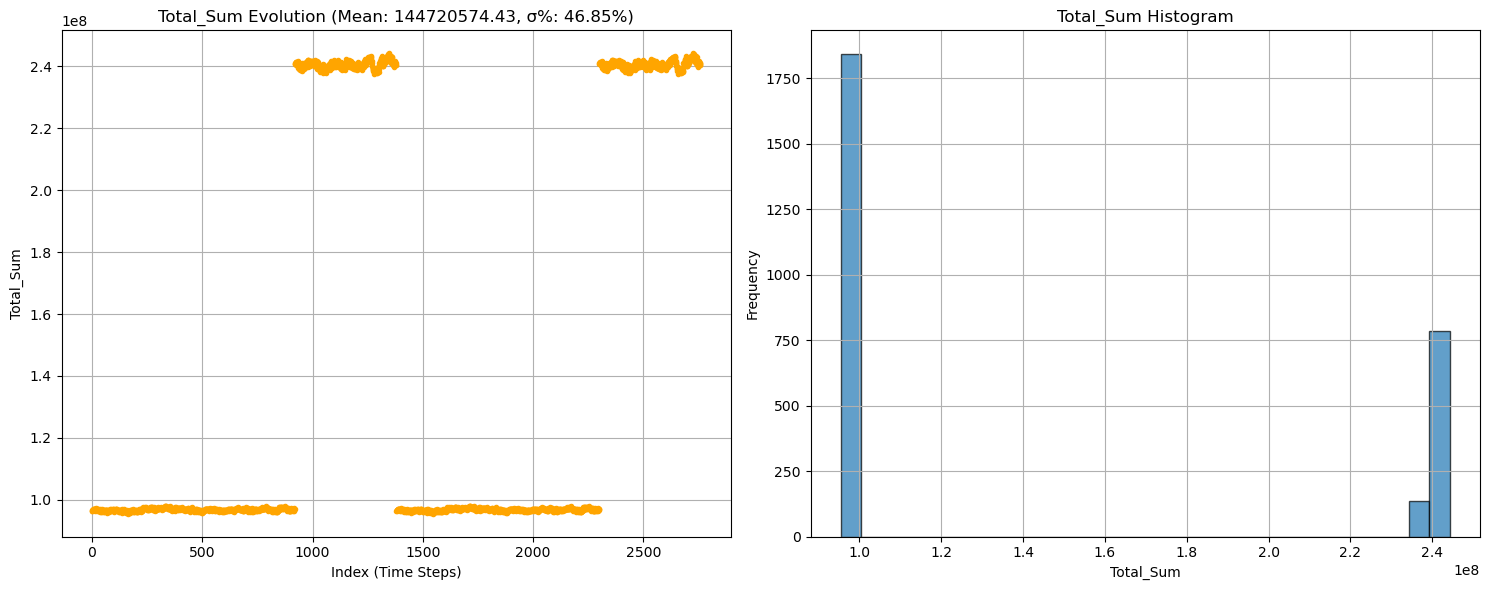

Total_Sqr:
  Mean: 356956862338.40436
  Standard Deviation (σ): 319718904723.8403
  Standard Deviation as Percentage of Mean: 89.5679390023152%


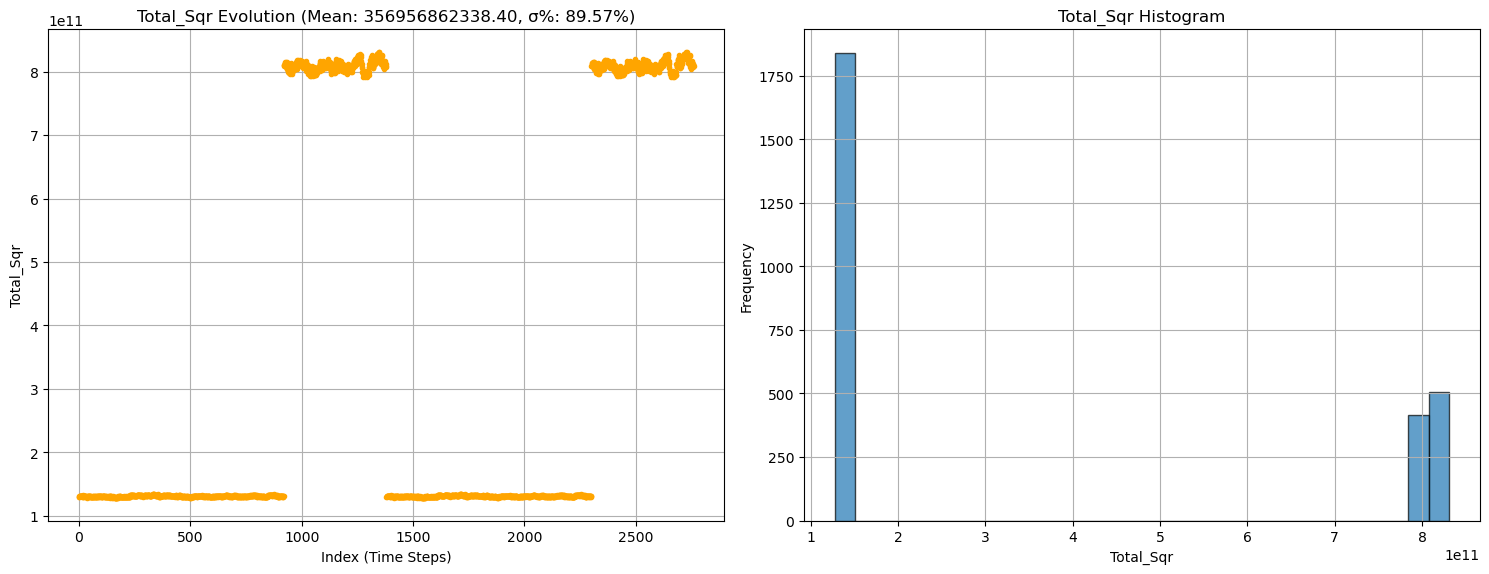

V_Mean:
  Mean: 0.2683360378391304
  Standard Deviation (σ): 0.0016244552861022956
  Standard Deviation as Percentage of Mean: 0.6053809615673649%


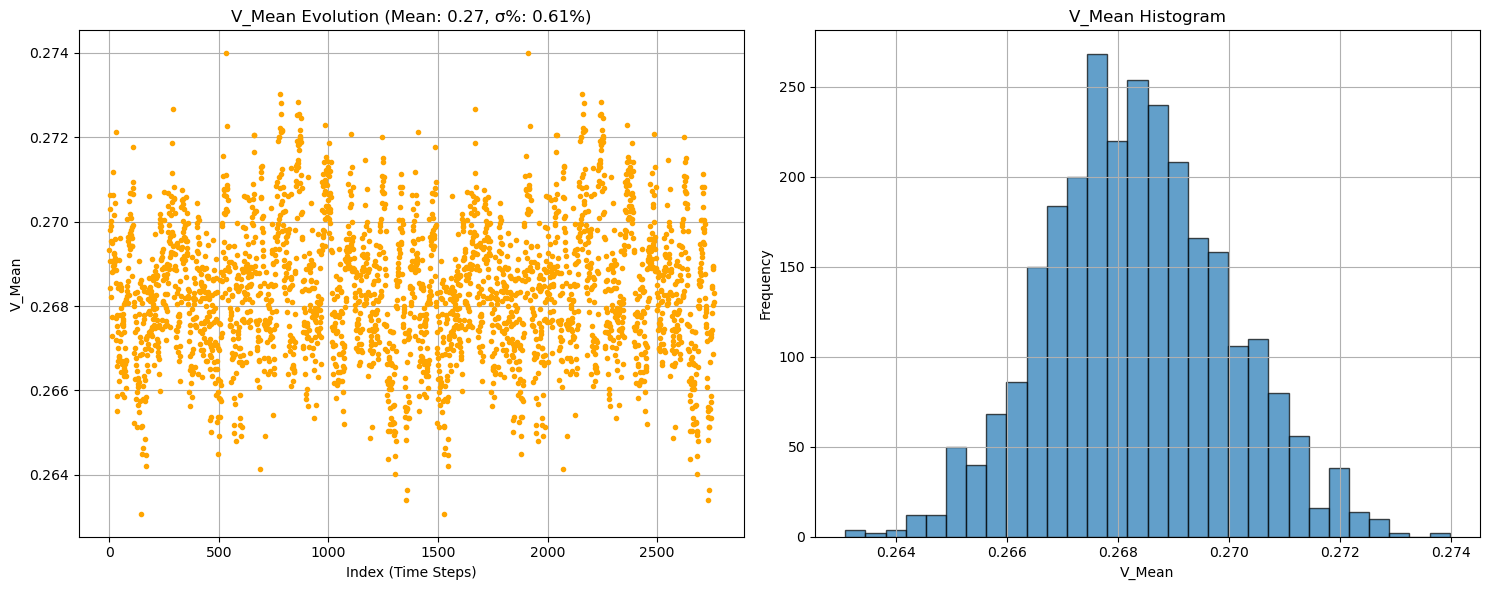

Std_V:
  Mean: 0.0018549457652173914
  Standard Deviation (σ): 0.0006158154915872964
  Standard Deviation as Percentage of Mean: 33.19857125392157%


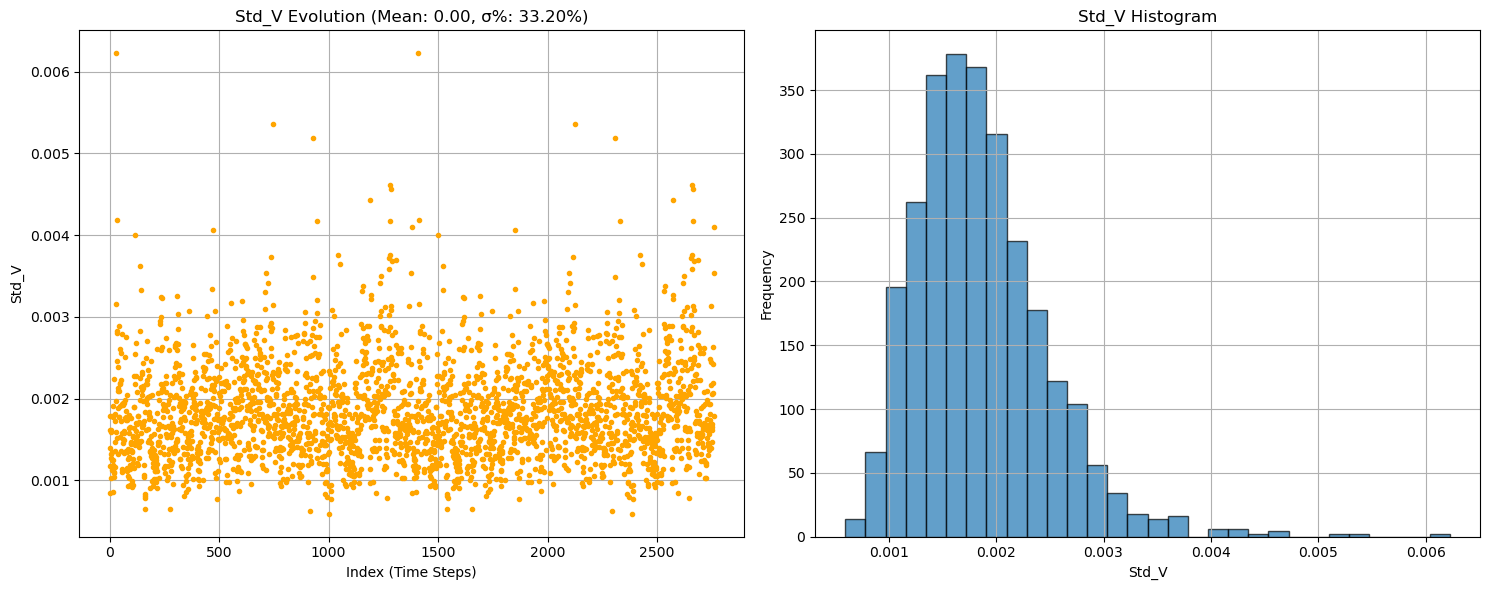

Temp:
  Mean: 21.221666666666668
  Standard Deviation (σ): 0.08857196027475658
  Standard Deviation as Percentage of Mean: 0.4173657124389692%


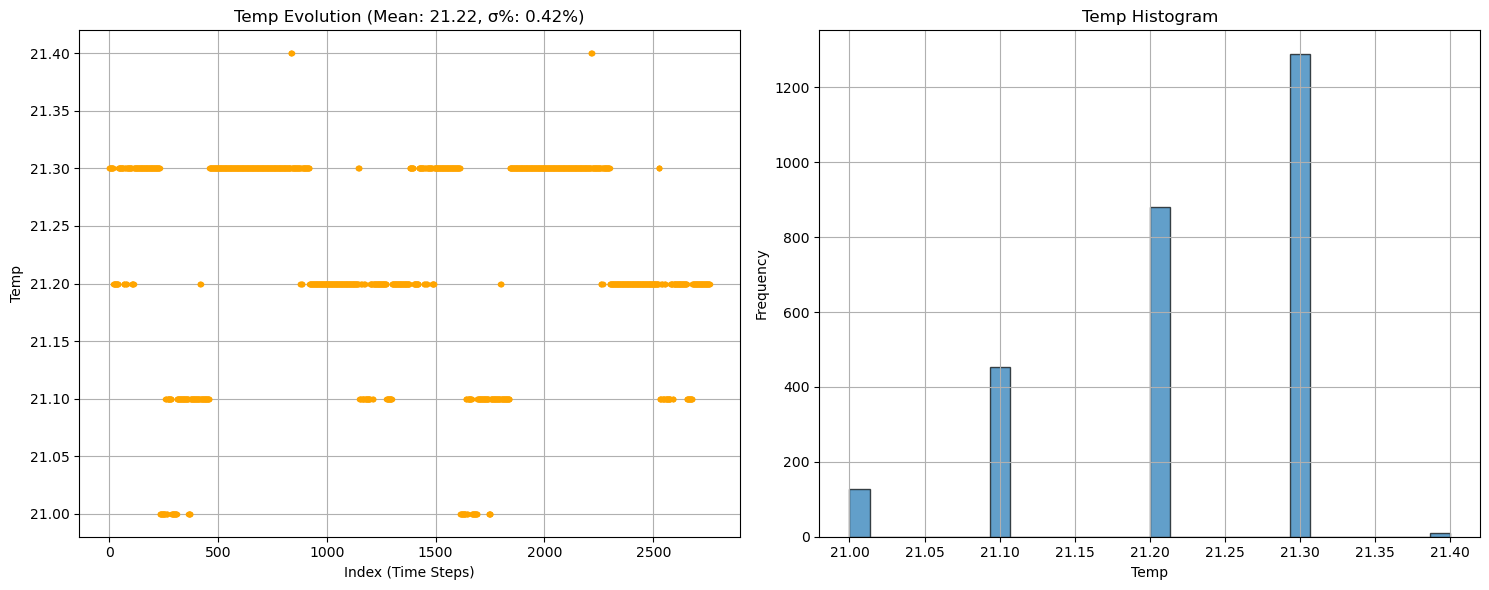

Humidity:
  Mean: 38.00797101449275
  Standard Deviation (σ): 0.5497452827687361
  Standard Deviation as Percentage of Mean: 1.4463947116753844%


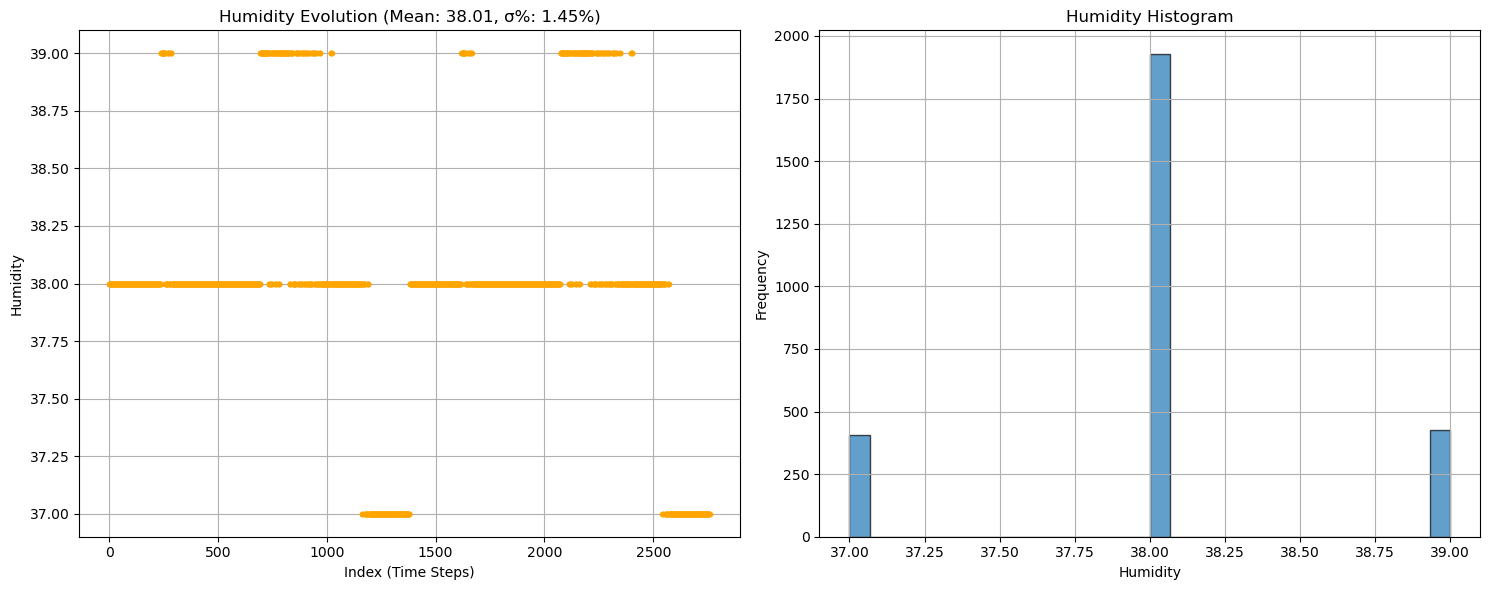

Total_Counts:
  Mean: 71547.04637681159
  Standard Deviation (σ): 97.95462786725214
  Standard Deviation as Percentage of Mean: 0.13690939434643%


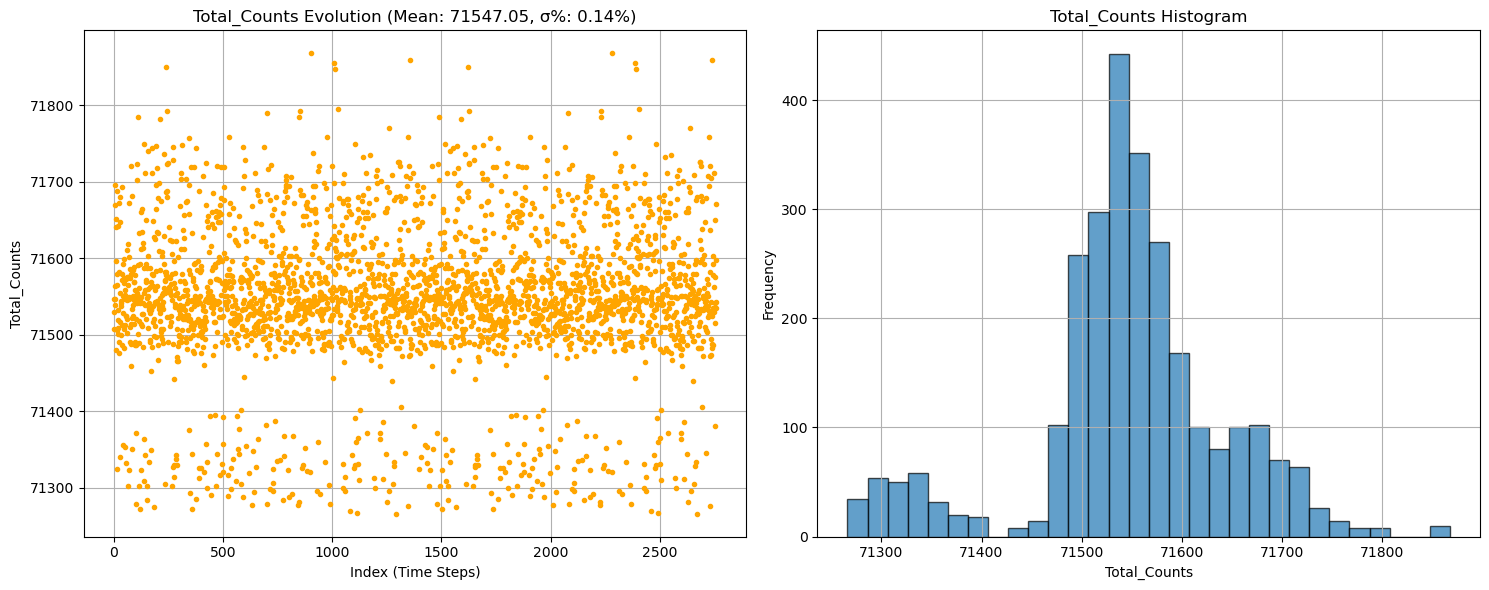

In [33]:
import matplotlib.pyplot as plt
# Plot each column except 'Date' and 'Time'
columns_to_plot = ['Laser_Power', 'Total_Sum', 'Total_Sqr', 'V_Mean', 'Std_V', 'Temp', 'Humidity', 'Total_Counts']

# Create a plot for each column
for column in columns_to_plot:
    # Calculate mean and variance
    mean_value = final_df[column].mean()
    std_dev = final_df[column].std()  # Standard deviation
    
    # Calculate sigma as a percentage of the mean
    sigma_percentage = (std_dev / mean_value) * 100 if mean_value != 0 else 0
    
    # Print mean and sigma (standard deviation)
    print(f'{column}:')
    print(f'  Mean: {mean_value}')
    print(f'  Standard Deviation (σ): {std_dev}')
    print(f'  Standard Deviation as Percentage of Mean: {sigma_percentage}%')
    
    
    # Create a subplot with 2 plots side by side (1 row, 2 columns)
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # Adjust the figure size as necessary

    # Plot the evolution of values (line plot) on the left
    axs[0].plot(final_df[column], '.', color='orange')
    axs[0].set_title(f'{column} Evolution (Mean: {mean_value:.2f}, σ%: {sigma_percentage:.2f}%)')
    axs[0].set_xlabel('Index (Time Steps)')
    axs[0].set_ylabel(column)
    axs[0].grid(True)

    # Plot the histogram on the right
    axs[1].hist(final_df[column], bins=30, edgecolor='black', alpha=0.7)
    axs[1].set_title(f'{column} Histogram')
    axs[1].set_xlabel(column)
    axs[1].set_ylabel('Frequency')
    axs[1].grid(True)

    # Adjust the layout to prevent overlapping
    plt.tight_layout()
    
    # Show the combined plots
    plt.show()
